In [1]:
from pathlib import Path

import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from PIL import Image

from ml.vision.resize import resizeright

## Out resizing

In [2]:
original_image_path = Path("../data/train")
resized_image_path = Path("../data/train_224")

In [3]:
original_image_fpaths = list(original_image_path.glob("*.jpg"))
original_image_fpaths[:5]

[PosixPath('../data/train/c05fc6c26ed3a25760acd313a2557a30.jpg'),
 PosixPath('../data/train/ee042113639bc026c49305137511a866.jpg'),
 PosixPath('../data/train/821b77dee521fcf9d5bfdf97e5d8a0b0.jpg'),
 PosixPath('../data/train/8c6578b304039b0c2da4e79df723e3bd.jpg'),
 PosixPath('../data/train/1266dfa9bad7ab3c2cbee98fa1ac51f6.jpg')]

In [4]:
resized_image_fpaths = list(resized_image_path.glob("*.jpg"))
resized_image_fpaths[:5]

[PosixPath('../data/train_224/c05fc6c26ed3a25760acd313a2557a30.jpg'),
 PosixPath('../data/train_224/ee042113639bc026c49305137511a866.jpg'),
 PosixPath('../data/train_224/821b77dee521fcf9d5bfdf97e5d8a0b0.jpg'),
 PosixPath('../data/train_224/8c6578b304039b0c2da4e79df723e3bd.jpg'),
 PosixPath('../data/train_224/1266dfa9bad7ab3c2cbee98fa1ac51f6.jpg')]

## Compare images resized by our method, `Albumentations`, and `resizeright`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

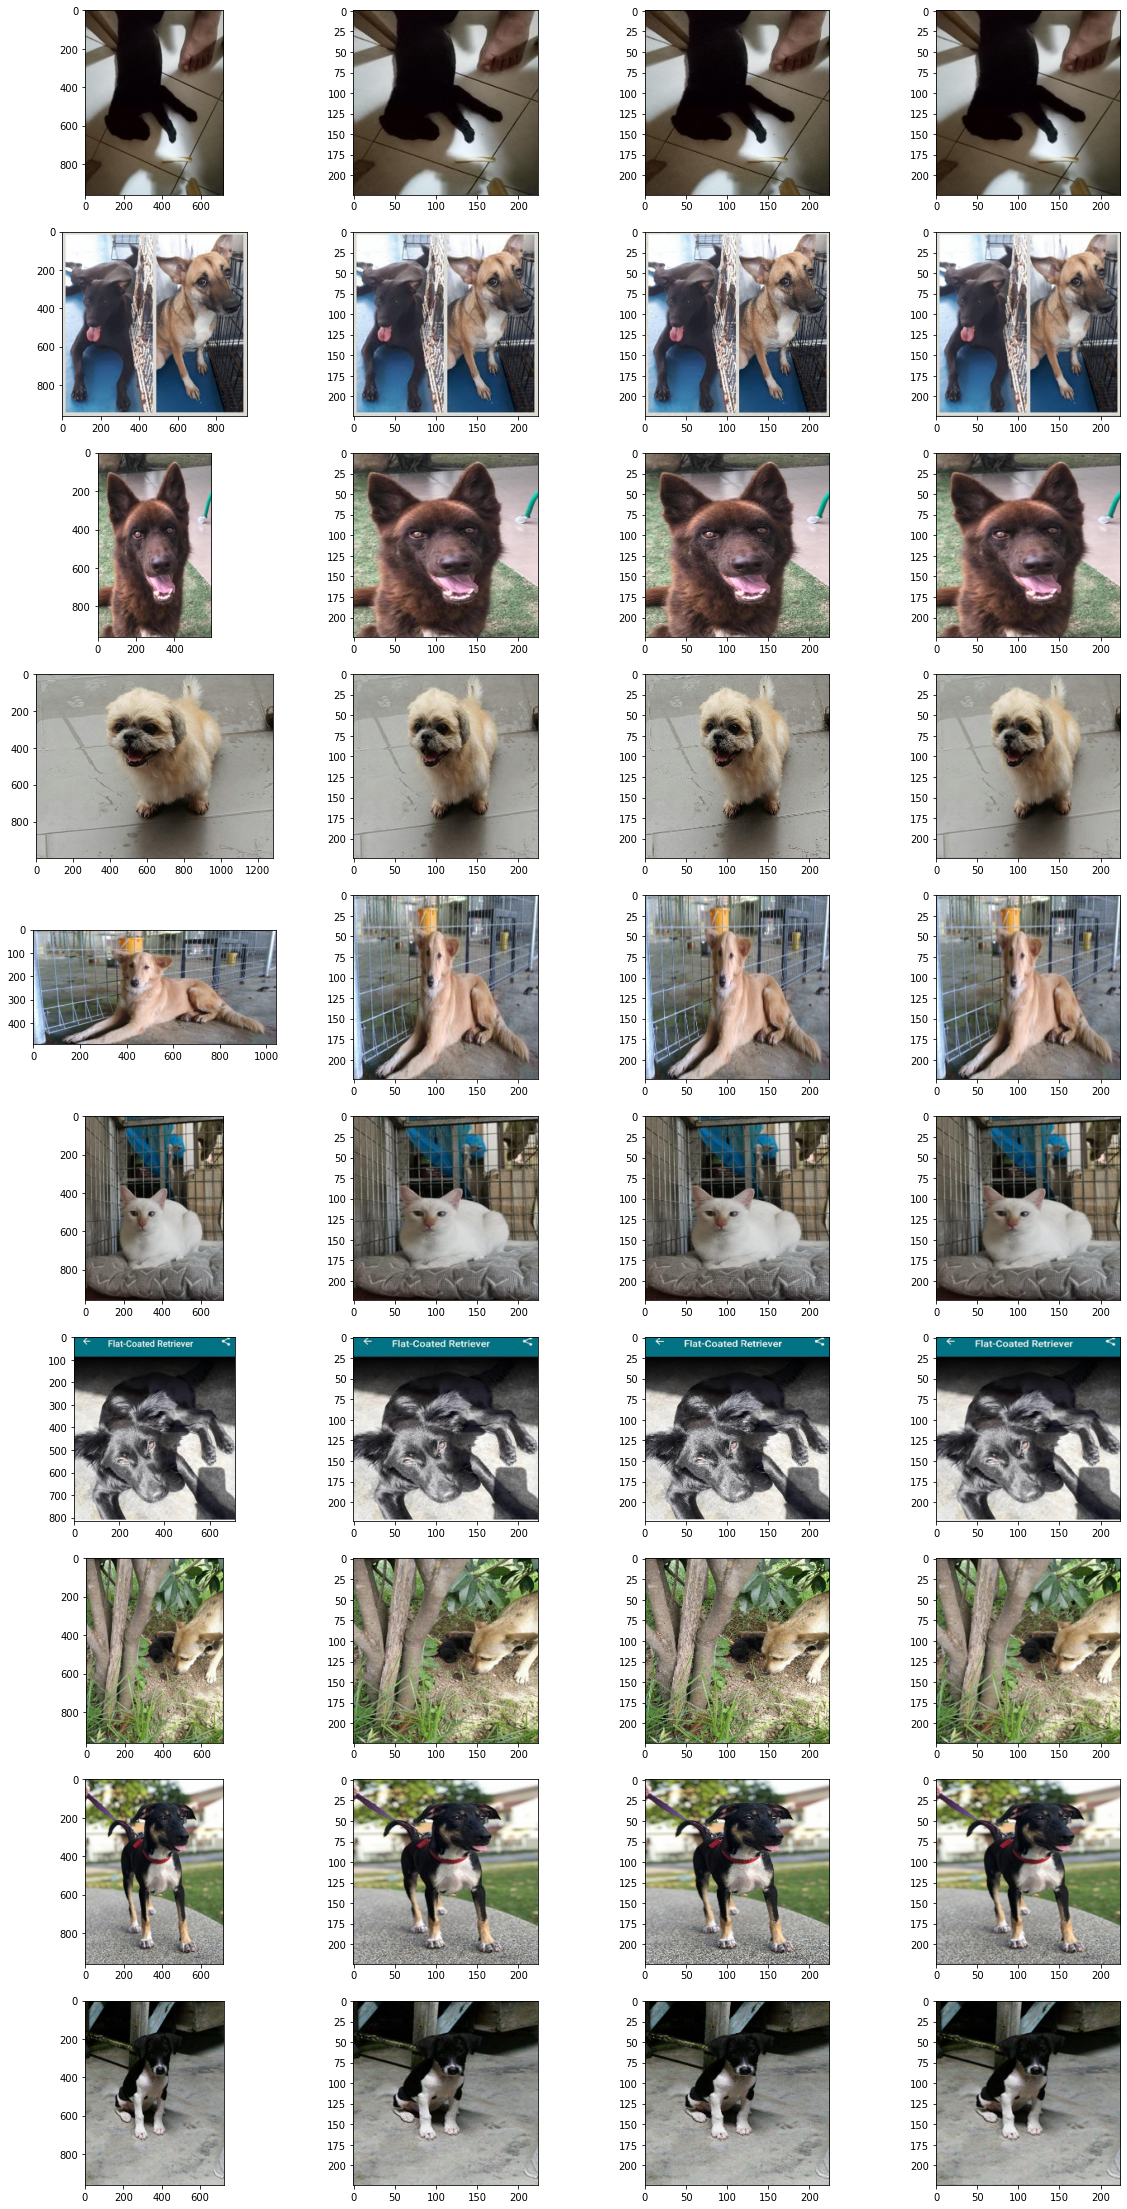

In [5]:


n_rows = 10
n_cols = 4

idx = 1

plt.figure(figsize=(20,40))

for i in range(n_rows):
    # original
    img1 = Image.open(original_image_fpaths[i])
    plt.subplot(n_rows, n_cols, idx)
    plt.imshow(img1)
    idx += 1
    
    # ours
    img2 = Image.open(resized_image_fpaths[i])
    plt.subplot(n_rows, n_cols, idx)
    plt.imshow(img2)
    idx += 1
    
    # albumentations
    img1_array = np.array(Image.open(original_image_fpaths[i]))
    img3 = A.Resize(224, 224)(image=img1_array)["image"]
    plt.subplot(n_rows, n_cols, idx)
    plt.imshow(img3)
    idx += 1
    
    # resizeright 
    img1_array = np.array(Image.open(original_image_fpaths[i]))
    img4 = resizeright(img1_array)
    plt.subplot(n_rows, n_cols, idx)
    plt.imshow(img4)
    idx += 1
plt.show()

Image 2 and 4 look similar, but they aren't exactly the same. Image 3 is not as defined, especially if you focus on lines appearing in the fourth example. 

In [6]:
diff = (img4 - torch.tensor(np.array(img2) / 255.))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


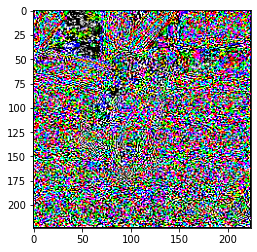

In [7]:
plt.imshow(diff * 255.)

In [8]:
diff.mean(), diff.std()

(tensor(-0.0007, dtype=torch.float64), tensor(0.0203, dtype=torch.float64))

The difference between our method and the resize right method is also not random ― see top right corner.